In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from mpl_toolkits.mplot3d import Axes3D

### Données initiales

In [2]:
def dAx(A,dx):
    DA = np.zeros_like(A)
    n = len(A)
    for i in range(n):
        for j in range(n):
            if i==0:
                DA[i,j] = (-A[i+2,j]+4*A[i+1,j]-3*A[i,j])/2/dx
            elif i==n-1:
                DA[i,j] = (A[i-2,j]-4*A[i-1,j]+3*A[i,j])/2/dx
            else:
                DA[i,j] = (A[i+1,j]-A[i-1,j])/2/dx
    return DA

In [3]:
def dAy(A,dy):
    DA = np.zeros_like(A)
    n = len(A)
    for i in range(n):
        for j in range(n):
            if j==0:
                DA[i,j] = (-A[i,j+2]+4*A[i,j+1]-3*A[i,j])/2/dy
            elif j==n-1:
                DA[i,j] = (A[i,j-2]-4*A[i,j-1]+3*A[i,j])/2/dy
            else:
                DA[i,j] = (A[i,j+1]-A[i,j-1])/2/dy
    return DA

In [4]:
def d2Ax(A,dx):
    DA = np.zeros_like(A)
    n = len(A)
    for i in range(n):
        for j in range(n):
            if i==0:
                DA[i,j] = (2*A[i,j]-5*A[i+1,j]+4*A[i+2,j]-A[i+3,j])/dx/dx
            elif i==n-1:
                DA[i,j] = (2*A[i,j]-5*A[i-1,j]+4*A[i-2,j]-A[i-3,j])/dx/dx
            else:
                DA[i,j] = (A[i+1,j]-2*A[i,j]+A[i-1,j])/dx/dx
    return DA

In [5]:
def d2Ay(A,dy):
    DA = np.zeros_like(A)
    n = len(A)
    for i in range(n):
        for j in range(n):
            if j==0:
                DA[i,j] = (2*A[i,j]-5*A[i,j+1]+4*A[i,j+2]-A[i,j+3])/dy/dy
            elif j==n-1:
                DA[i,j] = (2*A[i,j]-5*A[i,j-1]+4*A[i,j-2]-A[i,j-3])/dy/dy
            else:
                DA[i,j] = (A[i,j+1]-2*A[i,j]+A[i,j-1])/dy/dy
    return DA

In [6]:
def A0(x,y):
    return (x**2-1)*(y**2-1)

In [7]:
def B0(x,y):
    return 0

In [8]:
def V(v0,x,y):
    return v0*x*np.sin(np.pi*(y+1)/2)

In [9]:
def f_alpha(alpha0,x,y):
    return alpha0*np.cos(np.pi*(y+1)/2)

### Schéma euler explicite

In [36]:
nx = 30
ny = 30
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
h = x[1]-x[0]
v0 = 5
#alpha0 = 15
alpha0 = -15
beta = 0.2
A = np.zeros((nx,ny))
Bz = np.zeros_like(A)
Vz = np.zeros_like(A)
alpha = np.zeros_like(A)
t = 0
T = 10  # temps final

for i in range(nx):
    for j in range(ny):
        A[i,j] = A0(x[i],y[j])
        Vz[i,j] = V(v0,x[i],y[j])
        alpha[i,j] = f_alpha(alpha0,x[i],y[j])
        
tt = [0]   # Intervalle de temps

xx = int(2*nx/3)   # Point qcq
yy = int(3*ny/4)   # Point qcq
A2 = [A[xx,yy]**2]   # Valeur de A^2 pour un couple
B2 = [Bz[xx,yy]**2]   # Valeur de B^2 pour un couple



B_pap = 1*Bz[xx,:]

while t < T:
    DAx = dAx(A,h)
    DAy = dAy(A,h)
    D2Ax = d2Ax(A,h)
    D2Ay = d2Ay(A,h)
    D2Bx = d2Ax(Bz,h)
    D2By = d2Ay(Bz,h)
    DVx = dAx(Vz,h)
    DVy = dAy(Vz,h)
    
    dt = h/max(v0,alpha0,beta/h/h)  # Condition CFL
    
    A[1:-1,1:-1] = A[1:-1,1:-1] + dt*alpha[1:-1,1:-1]*Bz[1:-1,1:-1] + dt*beta*(D2Ax[1:-1,1:-1]+D2Ay[1:-1,1:-1])
    Bz[1:-1,1:-1] = Bz[1:-1,1:-1] +  dt*(DVx[1:-1,1:-1]*DAy[1:-1,1:-1]-DVy[1:-1,1:-1]*DAx[1:-1,1:-1]) + dt*beta*(D2Bx[1:-1,1:-1]+D2By[1:-1,1:-1]) 
    
    B_pap = np.vstack((B_pap,Bz[xx,:]))
    
    t += dt
    tt.append(t)  
    A2.append(A[xx,yy]**2)
    B2.append(Bz[xx,yy]**2)

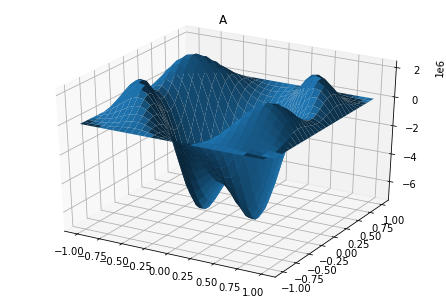

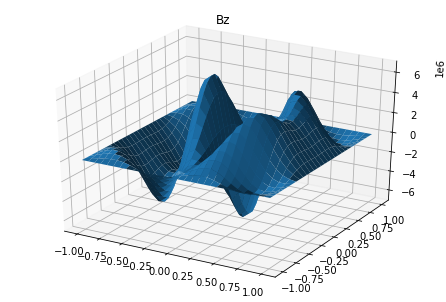

In [37]:
X,Y = np.meshgrid(x,y)
ax1 = Axes3D(plt.figure(1))
plt.title("A")
ax2 = Axes3D(plt.figure(2))
plt.title("Bz")
ax1.plot_surface(X,Y,A)
ax2.plot_surface(X,Y,Bz)
plt.show()

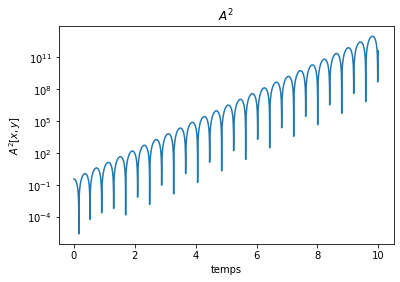

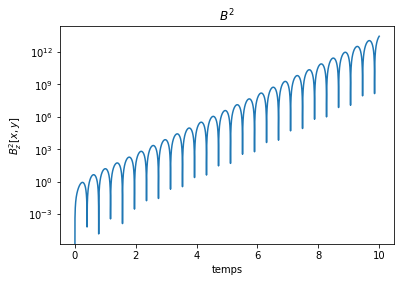

In [38]:
plt.title('$A^2$')
plt.xlabel('temps')
plt.ylabel('$A^2[x,y]$')
plt.semilogy(tt,A2)
plt.figure(2)
plt.title('$B^2$')
plt.xlabel('temps')
plt.ylabel('$B_z^2[x,y]$')
plt.semilogy(tt,B2)
plt.show()

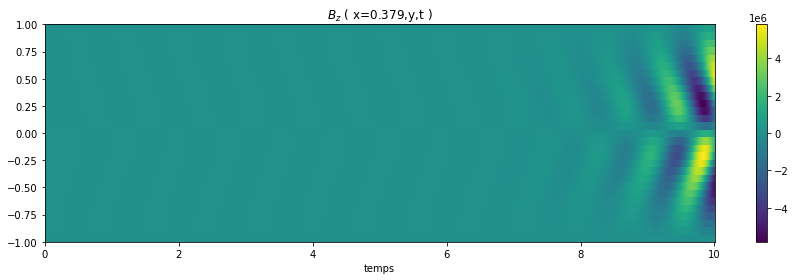

In [39]:
plt.figure(figsize=(15,4))
plt.xlabel('temps')
plt.pcolor(tt,y,B_pap.T) 
plt.colorbar()
plt.title('$B_z$ ( x=0.379,y,t )')
plt.show()

In [50]:
nx = 20
ny = 20
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
h = x[1]-x[0]
v0 = 5
#alpha0 = 15
alpha0 = -15
beta = 0.2
A1 = np.zeros((nx,ny))
Bz1 = np.zeros_like(A1)
Vz1 = np.zeros_like(A1)
alpha1 = np.zeros_like(A1)
t = 0
T = 50  # temps final

for i in range(nx):
    for j in range(ny):
        A1[i,j] = A0(x[i],y[j])
        Vz1[i,j] = V(v0,x[i],y[j])
        alpha1[i,j] = f_alpha(alpha0,x[i],y[j])
        
tt = [0]   # Intervalle de temps
xx = int(2*nx/3)   # Point qcq
yy = int(3*ny/4)   # Point qcq

A12 = [A1[xx,yy]**2]    # Valeur de A^2 pour un couple
B12 = [Bz1[xx,yy]**2]   # Valeur de B^2 pour un couple

B_pap1 = 1*Bz1[xx,:]

while t < T:
    DAx = dAx(A1,h)
    DAy = dAy(A1,h)
    D2Ax = d2Ax(A1,h)
    D2Ay = d2Ay(A1,h)
    D2Bx = d2Ax(Bz1,h)
    D2By = d2Ay(Bz1,h)
    DVx = dAx(Vz1,h)
    DVy = dAy(Vz1,h)
    
    dt = h/max(v0,alpha0,beta/h/h)  # Condition CFL
    
    A1[1:-1,1:-1] = A1[1:-1,1:-1] + dt*alpha1[1:-1,1:-1]*Bz1[1:-1,1:-1] + dt*beta*(D2Ax[1:-1,1:-1]+D2Ay[1:-1,1:-1])
    Bz1[1:-1,1:-1] = Bz1[1:-1,1:-1] +  dt*(DVx[1:-1,1:-1]*DAy[1:-1,1:-1]-DVy[1:-1,1:-1]*DAx[1:-1,1:-1]) + dt*beta*(D2Bx[1:-1,1:-1]+D2By[1:-1,1:-1]) 
    
    alpha1 /= (1+Bz1[xx,yy]**2/1e8)
    t += dt
    
    tt.append(t) 
    B_pap1 = np.vstack((B_pap1,Bz1[xx,:]))
    A12.append(A1[xx,yy]**2)
    B12.append(Bz1[xx,yy]**2)

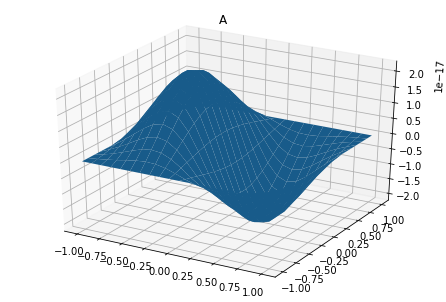

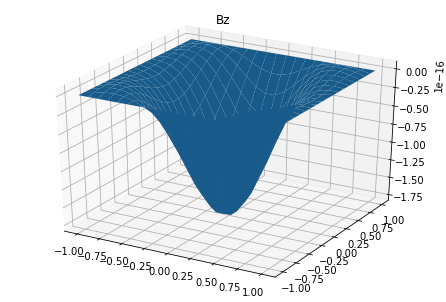

In [51]:
X1,Y1 = np.meshgrid(x,y)
ax1 = Axes3D(plt.figure(1))
plt.title("A")
ax2 = Axes3D(plt.figure(2))
plt.title("Bz")
ax1.plot_surface(X1,Y1,A1)
ax2.plot_surface(X1,Y1,Bz1)
plt.show()

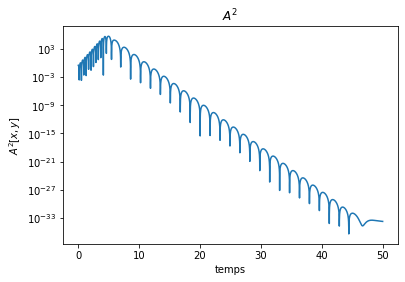

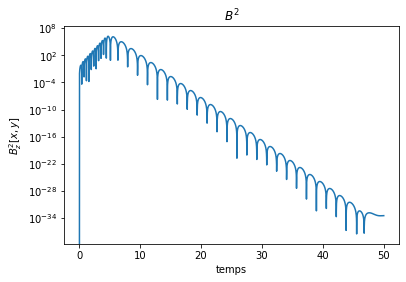

In [52]:
plt.title('$A^2$')
plt.xlabel('temps')
plt.ylabel('$A^2[x,y]$')
plt.semilogy(tt,A12)
plt.figure(2)
plt.title('$B^2$')
plt.xlabel('temps')
plt.ylabel('$B_z^2[x,y]$')
plt.semilogy(tt,B12)
plt.show()

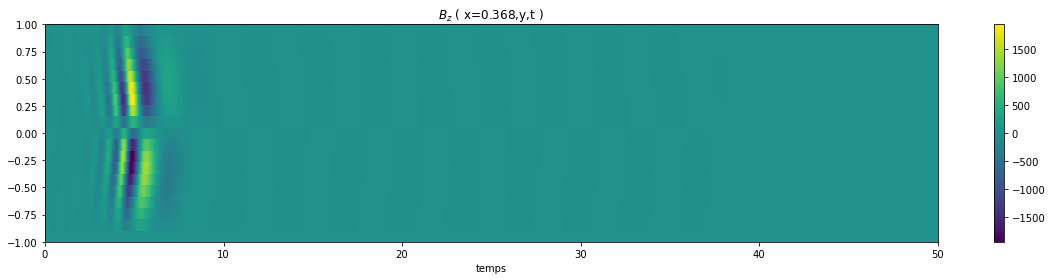

In [53]:
plt.figure(figsize=(20,4))
plt.xlabel('temps')
plt.pcolor(tt,y,B_pap1.T) 
plt.colorbar()
plt.title('$B_z$ ( x=0.368,y,t )')
plt.show()

### Schéma implicite

In [10]:
def A0_1(x):
    return x**2-1 

In [11]:
def B0_1(x):
    return 0

In [33]:
N = 50
x = np.linspace(-1,1,N)
h = x[1]-x[0]
v0 = 5
alpha0 = 15
#alpha0 = -15
beta = 0.2
AA = np.zeros(N)
BB = np.zeros_like(AA)
alpha2 = np.zeros_like(AA)
t = 0
T = 10  # temps final

for i in range(N):
    AA[i] = A0_1(x[i])
    alpha2[i] = f_alpha(alpha0,0,x[i])
        
tt = [0]   # Intervalle de temps

xx = int(2*N/3)   # Point qcq

AA2 = [AA[xx]**2]    # Valeur de A^2 pour un couple
BB2 = [BB[xx]**2]   # Valeur de B^2 pour un couple

B_pap1 = 1*BB
dt = h**2  # Condition CFL

ALPHA = np.diag(alpha2)
M1 = (-2*np.eye(N-2,N-2)+np.eye(N-2,N-2,1)+np.eye(N-2,N-2,-1))/h/h  #derive seconde de A ou B
M2 = np.linalg.inv(np.eye(N-2,N-2)-dt*beta*M1)  #matrice a inverser
M3 = (np.eye(N-2,N-2,1)-np.eye(N-2,N-2,-1))/h/2    #derivee de A
M4 = np.linalg.inv(np.eye(N-2,N-2)-dt*dt*v0*M2@ALPHA[1:-1,1:-1]@M2@M3)  #matrice a inverser pour An
M5 = np.linalg.inv(np.eye(N-2,N-2)-dt*dt*v0*M2@M3@M2@ALPHA[1:-1,1:-1])  #matrice a inverser pour Bn 


while t < T:
    
    AA[1:-1] = M4@M2@AA[1:-1] + dt*M4@M2@ALPHA[1:-1,1:-1]@M2@BB[1:-1]
    BB[1:-1] = M5@M2@BB[1:-1] + dt*v0*M5@M2@M3@M2@AA[1:-1]

    t += dt
    tt.append(t) 
    
    B_pap1 = np.vstack((B_pap1,BB))
    AA2.append(AA[xx]**2)
    BB2.append(BB[xx]**2)

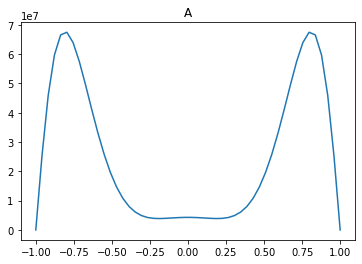

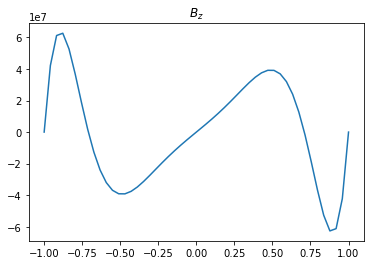

In [34]:
plt.plot(x,AA)
plt.title('A')
plt.figure(2)
plt.title('$B_z$')
plt.plot(x,BB)
plt.show()

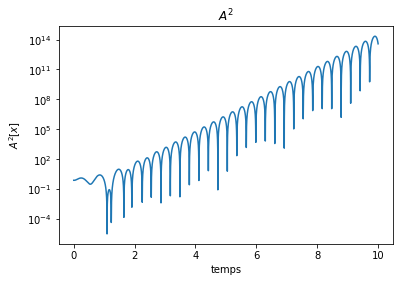

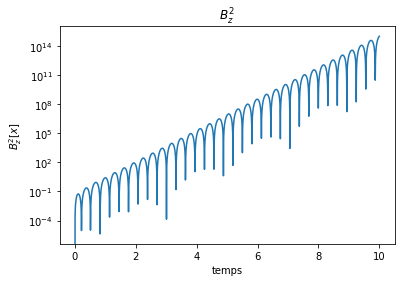

In [35]:
plt.title('$A^2$')
plt.xlabel('temps')
plt.ylabel('$A^2[x]$')
plt.semilogy(tt,AA2)
plt.figure(2)
plt.title('$B_z^2$')
plt.xlabel('temps')
plt.ylabel('$B_z^2[x]$')
plt.semilogy(tt,BB2)
plt.show()

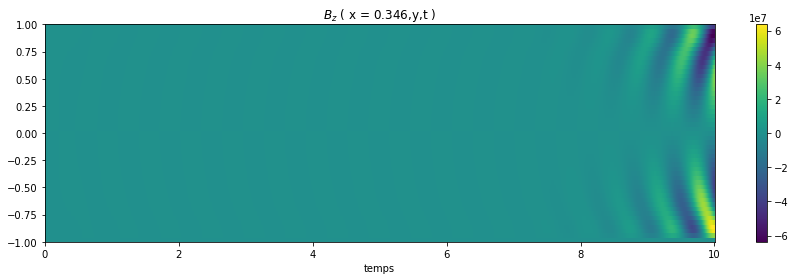

In [36]:
plt.figure(figsize=(15,4))
plt.xlabel('temps')
plt.pcolor(tt,x,B_pap1.T) 
plt.colorbar()
plt.title('$B_z$ ( x = 0.346,y,t )')
plt.show()

In [24]:
print(x[xx])

0.346938775510204
